In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Introduction

The basic idea is to clean the background of an image in order to get clear signal after summation along a specific direction.

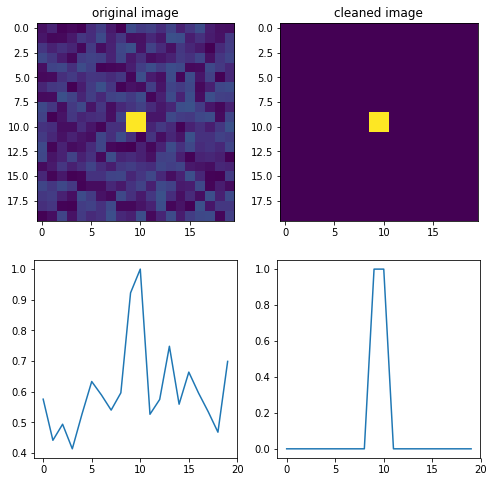

In [2]:
A=np.random.rand(20,20)/4
A[9:11,9:11]=1
B=np.zeros_like(A)
B[9:11,9:11]=1

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(A)
plt.title("original image")

plt.subplot(222)
plt.imshow(B)
plt.title("cleaned image")

plt.subplot(223)
plt.plot(np.sum(A,axis=0)/np.max(np.sum(A,axis=0)))

plt.subplot(224)
plt.plot(np.sum(B,axis=0)/np.max(np.sum(B,axis=0)))

plt.show()

# Original image

Soft X-ray with multiple photon-energy components is dispersed by a grating placed in a spectrometer. As a result, the photon-energy components are spatially separated. The dispersed soft X-ray hits a microchannel plate (MCP) detector. After that, electrons are emitted from the MCP and hit a phosphor screen. The phosphor screen emites photons if accelerated electrons hit the screen. The emitted light can be recorded by a camera.

The observed image is stored as a text file and shown below. The bright part is the detected soft X-ray. The x axis corresponds to the photon energy even though now it is expressed in pixel unit. The right side of the figure has higher photon energy. Because the photon energy of the soft X-ray is discrete, there are multiple strong signals in the image. 

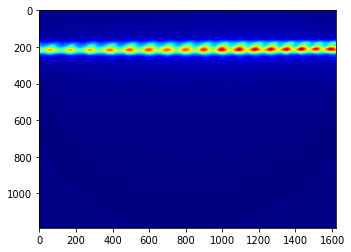

In [5]:
txtDatList=glob.glob(os.getcwd() + '/*.txt') 

img=np.loadtxt(txtDatList[0]).T

plt.imshow(img, cmap='jet')
plt.show()

# Function

If the signal intensity at a specific pixel is below the threshold (<strong>thr</strong> in the function), the defined function returns 0 for the intensity. The boundary is stored as <strong>sep_line</strong>. Hence, by visualizing the cleaned image and boundary, you can check whether the set threshold is appropreate.

In [6]:
def cleaningImage(img):
#img: m x n image

    ret_img= img-np.min(img) #set the minimum value as 0
    ret_img=ret_img/np.max(ret_img)  # normalization
    sep_line=np.zeros_like(ret_img) 

    ave=np.average(ret_img) # average 
    thr=0.07 # threshold

    for i in range(ret_img.shape[0]):
        for j in range(ret_img.shape[1]):
            if ret_img[i,j] < thr:
                ret_img[i,j] = 0

            if ret_img[i,j] < thr:
                sep_line[i,j] = 0
            else:
                sep_line[i,j] = 1
    
    return ret_img, sep_line # m x n

# Results

In [7]:
cleaned_img, sep_line = cleaningImage(img) # clean an image

The original and cleaned images are shown below.The boundary is shown by a yellow curve. As you can see, the signal intensity in the cleaned image is 0 (dark blue) outside of the boundary.

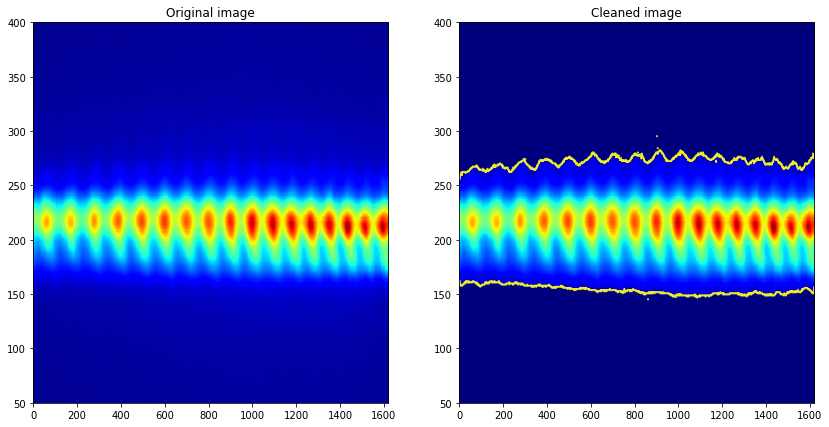

In [8]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(img,aspect='auto',cmap='jet')
plt.ylim([50,400])
plt.title("Original image")

plt.subplot(122)
plt.imshow(cleaned_img,aspect='auto',cmap='jet')
plt.contour(sep_line)
plt.ylim([50,400])
plt.title("Cleaned image")
plt.show()

If you sum up along a specific direction, contrast of the spectrum will be much better. The black curve in the figure below is a spectrum obtained from the original image. The red one is a spectrum obtained from the cleaned image. The spectroscopi signals are normalized at the maximum intensity. As you can see, clear peaks are visible in the red spectrum. 

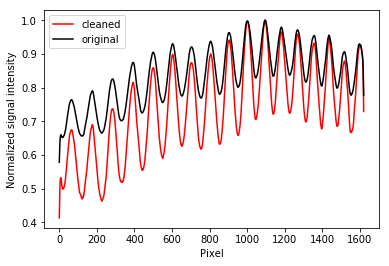

In [9]:
ax=0

cleaned_im=np.sum(cleaned_img,axis=ax)/np.max(np.sum(cleaned_img,axis=ax))
orig_im=np.sum(img,axis=ax)/np.max(np.sum(img,axis=ax))

plt.plot(cleaned_im, color='red', label='cleaned')
plt.plot(orig_im, color = 'black', label='original')
plt.xlabel('Pixel')
plt.ylabel('Normalized signal intensity')
plt.legend()

plt.show()